This notebook shows how to pre-process and invert ICESat-2 ATL15 data over subglacial lakes.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
sys.path.insert(0, '../source')
sys.path.insert(0, '../scripts')

First step: Choose a lake name from the Siegfried & Fricker (2018) inventory 

In [2]:
from load_lakes import gdf
print(gdf['name'].to_list())

['Bindschadler_1', 'Bindschadler_2', 'Bindschadler_3', 'Bindschadler_4', 'Bindschadler_5', 'Bindschadler_6', 'Byrd_1', 'Byrd_2', 'Byrd_s1', 'Byrd_s10', 'Byrd_s11', 'Byrd_s12', 'Byrd_s13', 'Byrd_s14', 'Byrd_s15', 'Byrd_s2', 'Byrd_s3', 'Byrd_s4', 'Byrd_s5', 'Byrd_s6', 'Byrd_s7', 'Byrd_s8', 'Byrd_s9', 'ConwaySubglacialLake', 'Cook_E1', 'Cook_E2', 'David_1', 'David_s1', 'David_s2', 'David_s3', 'David_s4', 'David_s5', 'EAP_1', 'EAP_2', 'EAP_3', 'EAP_4', 'EAP_5', 'EAP_6', 'EAP_7', 'EAP_8', 'EAP_9', 'EngelhardtSubglacialLake', 'Foundation_1', 'Foundation_10', 'Foundation_11', 'Foundation_12', 'Foundation_13', 'Foundation_14', 'Foundation_15', 'Foundation_16', 'Foundation_2', 'Foundation_3', 'Foundation_4', 'Foundation_5', 'Foundation_6', 'Foundation_7', 'Foundation_8', 'Foundation_9', 'Foundation_N1', 'Foundation_N2', 'Foundation_N3', 'Institute_E1', 'Institute_E2', 'Institute_W1', 'Institute_W2', 'KT1', 'KT2', 'KT3', 'Kamb_1', 'Kamb_10', 'Kamb_11', 'Kamb_12', 'Kamb_2', 'Kamb_3', 'Kamb_4', 'K

You can also set lake_name = 'synth' for the synthetic example:

In [3]:
import metavars
metavars.lake_name = 'Cook_E2'        # set to 'synth' or one of the lakes in the inventory
lake_name = metavars.lake_name

Next, define paths to data directories (modify as necessary!)

See README for links to download the data

In [4]:
paths = {}
# paths['icesat'] = '../../ICESat-2/ATL15/ATL15_A3_0318_01km_003_01.nc' # SLM, MAC1
paths['icesat'] = '../../ICESat-2/ATL15/ATL15_A4_0318_01km_003_01.nc' # CookE2, Byrd
paths['wavi'] = '../../WAVI/WAVI_5km_Initial.nc'
paths['measures'] = '../../measures/antarctic_ice_vel_phase_map_v01.nc'
paths['bedmachine'] = '../../bedmachine/BedMachineAntarctica-v3.nc'

Next we pre-process the ICESat-2 data for use in the inversion... this can take several (15+) minutes!

This step is skipped if the data already exists.

You can edit certain aspects of the pre-processing, like the size of the bounding box around the lake, by modifying proc_icesat_data.py

In [5]:
from proc_icesat_data import proc_data
proc_data(lake_name,paths)

saved some images of elevation change maps in the data directory!


Next we will run the inversion.

In [6]:
# example script that runs the inversion
from inversion import invert
import numpy as np
from print_params import print_params

Print the auxiliar parameters (ice thickness, basal drag, viscosity, velocities):

In [7]:
# print the auxiliary model parameters
print_params()

auxiliary model parameters:
H = 2.694513916015625 km
beta = 2.70e+12 Pa s m^-1
eta = 3.50e+15 Pa s
u = 0.8187565365481373 m yr^-1
v = -0.23050711909590707 m yr^-1
relaxation time = 9.158899632590687 yr


Invert the data:

In [8]:
from params import data_dir,Nt,t_r

# load elevation data (h_obs)
h_obs = np.load(data_dir+'/h_obs.npy')

# set regularization parameter
eps = 1e0

# set reference time to define elevation anomaly
t_ref = 0 # set t_ref = 1.3 yr for SLM (Mercer Subglacial Lake)
# solve for the basal vertical velocity inversion
w_inv,h_fwd,mis = invert(h_obs,eps=eps,t_ref=t_ref)

Solving normal equations with CG....

CG iter. 440: rel. residual norm = 1.12e-06,  tol = 1.00e-06 
...CG converged!



Plot the results:

(the plotting script can be modified in plot_results.py)

maximum discrepancy = 0.0228138315623882 km^3
err pct = 12.883061740926449\%


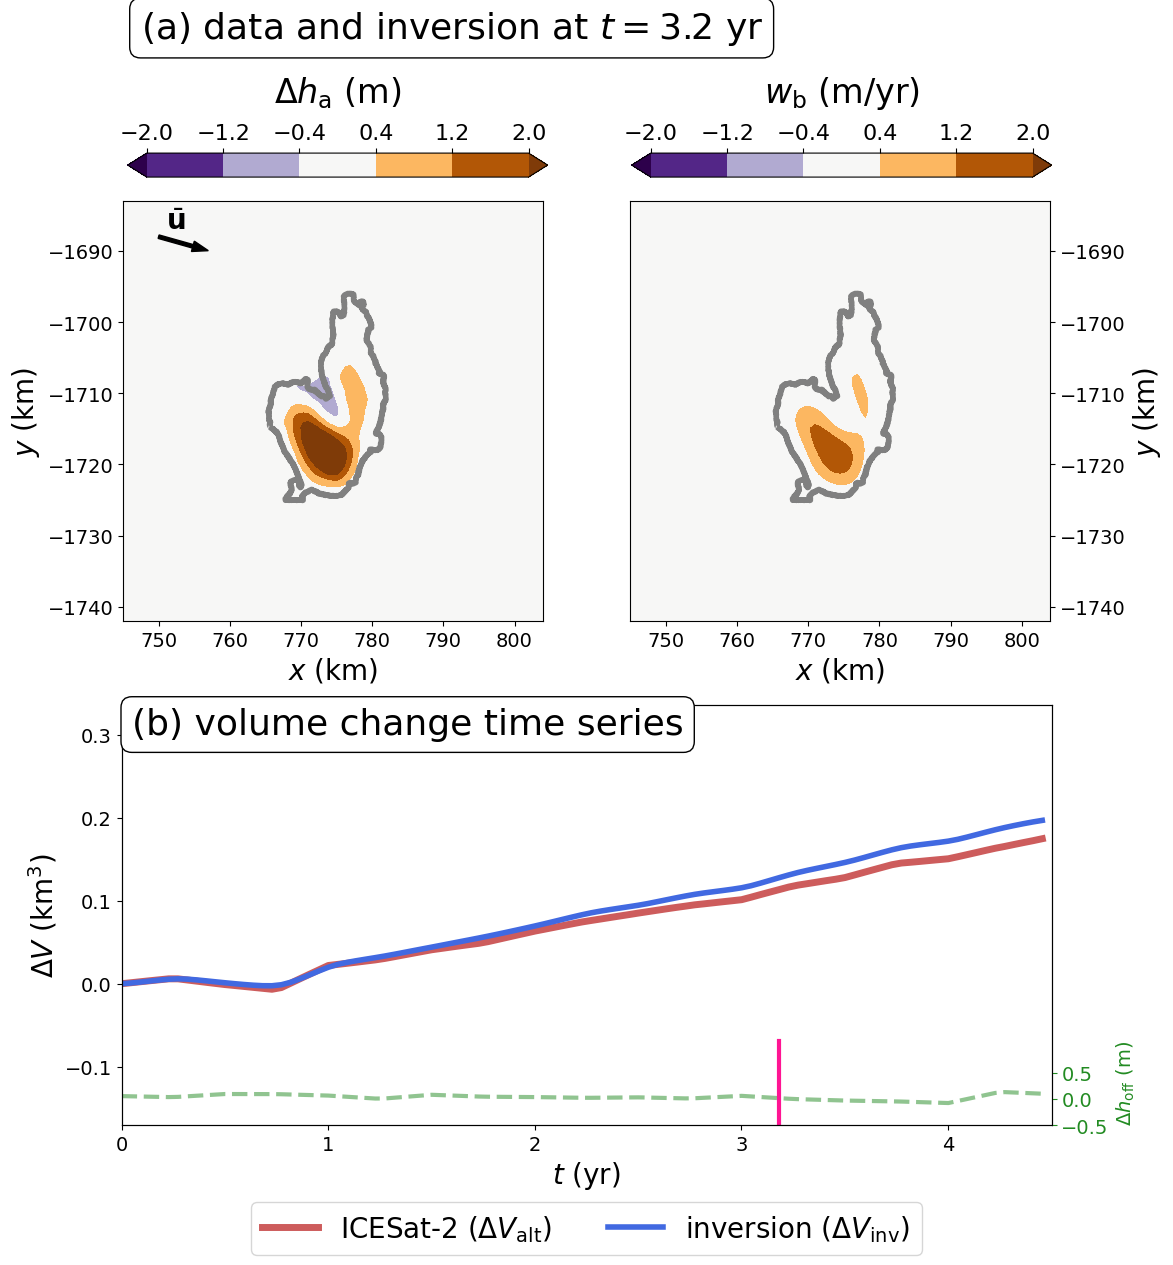

In [9]:
from plot_results import plot
# set the contour plot limits for the elevation and inversion with h_lim and w_lim, resp.
h_lim = 2.0
w_lim = 2.0
#timesteps = range(Nt)   # set timesteps to list with length >1 to make a movie
timesteps = [70]       # set timesteps to list with length == 1 to print single snapshot
plot(t_ref,timesteps=timesteps,h_lim=h_lim,w_lim=w_lim)   